![](https://raw.githubusercontent.com/rafneta/RNlibro/master/imagenes/banner.png)

```{contents}
:depth: 4
```

# Pandas


- [Página principal de Pandas](https://pandas.pydata.org/docs/index.html)
- [Documentación](https://pandas.pydata.org/docs/reference/index.html)

Tomamos una muestra de la guía rápida de Pandas ([10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)), junto con un par de complementos.


## Creamos objetos


In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,0.327217
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,-1.707350,0.792004
2013-01-04,0.653583,0.045141,0.089756,-1.587936
2013-01-05,-0.338248,-0.510625,-0.728928,-0.922109
2013-01-06,-1.111172,0.888673,0.933804,-0.535405


In [5]:
df2 = pd.DataFrame(

    {

        "A": 1.0,

        "B": pd.Timestamp("20130102"),

        "C": pd.Series(1, index=list(range(4)), dtype="float32"),

        "D": np.array([3] * 4, dtype="int32"),

        "E": pd.Categorical(["test", "train", "test", "train"]),

        "F": "foo",

    }

)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Dependiendo del editor de texto, se puede utilizar `<TAB>` para tener un despliegue de métodos.
   
Normalmente tenemos un archivo (local o remoto), con los datos. Tomaremos un ejemplo del repositorio de datos de [UCI, Machine Learning Repository](https://archive-beta.ics.uci.edu/)


Se tomará el siguiente conjunto de datos [Adult](https://archive-beta.ics.uci.edu/ml/datasets/adult) (1996). UCI Machine Learning Repository.

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [7]:
datos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
datos

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
datos = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header = None)
datos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
columnas = ["age", "workclass", "fnlwgt", "education", "education_num",
            "marital_status", "occupation","relationship", "race", "sex",
            "capital_gain","capital_loss","hours-per-week", "native-country", "class"]

datos = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header = None,
    names = columnas
    )
datos

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Desplegar los datos



In [10]:
df.head()

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,0.327217
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,-1.707350,0.792004
2013-01-04,0.653583,0.045141,0.089756,-1.587936
2013-01-05,-0.338248,-0.510625,-0.728928,-0.922109


In [11]:
df.tail()

,A,B,C,D
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,-1.707350,0.792004
2013-01-04,0.653583,0.045141,0.089756,-1.587936
2013-01-05,-0.338248,-0.510625,-0.728928,-0.922109
2013-01-06,-1.111172,0.888673,0.933804,-0.535405


In [12]:
df.to_numpy()

array([[ 2.03179957, -0.87734203, -0.73994628,  0.32721663],
       [-0.3278666 ,  0.73025887,  0.25242707,  0.12081674],
       [ 1.10691003,  0.59866203, -1.70734983,  0.79200383],
       [ 0.65358318,  0.04514085,  0.08975635, -1.58793648],
       [-0.33824845, -0.51062491, -0.72892778, -0.92210864],
       [-1.11117228,  0.88867303,  0.93380381, -0.53540453]])

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.335834,0.145795,-0.316706,-0.300902
std,1.145472,0.719219,0.931219,0.879110
min,-1.111172,-0.877342,-1.707350,-1.587936
25%,-0.335653,-0.371683,-0.737192,-0.825433
50%,0.162858,0.321901,-0.319586,-0.207294
75%,0.993578,0.697360,0.211759,0.275617
max,2.031800,0.888673,0.933804,0.792004


In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,2.031800,-0.327867,1.106910,0.653583,-0.338248,-1.111172
B,-0.877342,0.730259,0.598662,0.045141,-0.510625,0.888673
C,-0.739946,0.252427,-1.707350,0.089756,-0.728928,0.933804
D,0.327217,0.120817,0.792004,-1.587936,-0.922109,-0.535405


In [16]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,0.327217,-0.739946,-0.877342,2.031800
2013-01-02,0.120817,0.252427,0.730259,-0.327867
2013-01-03,0.792004,-1.707350,0.598662,1.106910
2013-01-04,-1.587936,0.089756,0.045141,0.653583
2013-01-05,-0.922109,-0.728928,-0.510625,-0.338248
2013-01-06,-0.535405,0.933804,0.888673,-1.111172


In [17]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,0.327217
2013-01-05,-0.338248,-0.510625,-0.728928,-0.922109
2013-01-04,0.653583,0.045141,0.089756,-1.587936
2013-01-03,1.106910,0.598662,-1.707350,0.792004
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-06,-1.111172,0.888673,0.933804,-0.535405


## Selección

In [18]:
df["A"]

2013-01-01    2.031800
2013-01-02   -0.327867
2013-01-03    1.106910
2013-01-04    0.653583
2013-01-05   -0.338248
2013-01-06   -1.111172
Freq: D, Name: A, dtype: float64

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,0.327217
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,-1.707350,0.792004


In [20]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,-1.707350,0.792004
2013-01-04,0.653583,0.045141,0.089756,-1.587936


### Selección con etiqueta

In [21]:
df.loc[dates[0]]

A    2.031800
B   -0.877342
C   -0.739946
D    0.327217
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,2.031800,-0.877342
2013-01-02,-0.327867,0.730259
2013-01-03,1.106910,0.598662
2013-01-04,0.653583,0.045141
2013-01-05,-0.338248,-0.510625
2013-01-06,-1.111172,0.888673


In [23]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.327867,0.730259
2013-01-03,1.106910,0.598662
2013-01-04,0.653583,0.045141


In [24]:
df.loc["20130102", ["A", "B"]]

A   -0.327867
B    0.730259
Name: 2013-01-02 00:00:00, dtype: float64

In [25]:
df.loc[dates[0], "A"]

2.0317995693986375

### Selección por posición 

In [26]:
df.iloc[3]

A    0.653583
B    0.045141
C    0.089756
D   -1.587936
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.653583,0.045141
2013-01-05,-0.338248,-0.510625


In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.327867,0.252427
2013-01-03,1.106910,-1.707350
2013-01-05,-0.338248,-0.728928


In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.327867,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,-1.707350,0.792004


### Indexado lógico

In [30]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,0.327217
2013-01-03,1.106910,0.598662,-1.707350,0.792004
2013-01-04,0.653583,0.045141,0.089756,-1.587936


In [31]:
df[df > 0]

,A,B,C,D
2013-01-01,2.031800,NaN,NaN,0.327217
2013-01-02,NaN,0.730259,0.252427,0.120817
2013-01-03,1.106910,0.598662,NaN,0.792004
2013-01-04,0.653583,0.045141,0.089756,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,0.888673,0.933804,NaN


### Asignación

In [32]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [33]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,5
2013-01-02,-0.327867,0.730259,0.252427,5
2013-01-03,1.106910,0.598662,-1.707350,5
2013-01-04,0.653583,0.045141,0.089756,5
2013-01-05,-0.338248,-0.510625,-0.728928,5
2013-01-06,-1.111172,0.888673,0.933804,5


## Datos Faltantes

In [34]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,2.031800,-0.877342,-0.739946,5,1.0
2013-01-02,-0.327867,0.730259,0.252427,5,1.0
2013-01-03,1.106910,0.598662,-1.707350,5,NaN
2013-01-04,0.653583,0.045141,0.089756,5,NaN


In [35]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,2.031800,-0.877342,-0.739946,5,1.0
2013-01-02,-0.327867,0.730259,0.252427,5,1.0


In [36]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,2.031800,-0.877342,-0.739946,5,1.0
2013-01-02,-0.327867,0.730259,0.252427,5,1.0
2013-01-03,1.106910,0.598662,-1.707350,5,5.0
2013-01-04,0.653583,0.045141,0.089756,5,5.0


In [37]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operaciones

In [38]:
df.mean()

A    0.335834
B    0.145795
C   -0.316706
D    5.000000
dtype: float64

In [39]:
df.mean(1)

2013-01-01    1.353628
2013-01-02    1.413705
2013-01-03    1.249556
2013-01-04    1.447120
2013-01-05    0.855550
2013-01-06    1.427826
Freq: D, dtype: float64

In [40]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,2.031800,-0.877342,-0.739946,5
2013-01-02,1.703933,-0.147083,-0.487519,10
2013-01-03,2.810843,0.451579,-2.194869,15
2013-01-04,3.464426,0.496720,-2.105113,20
2013-01-05,3.126178,-0.013905,-2.834040,25
2013-01-06,2.015005,0.874768,-1.900237,30


## Gráficas

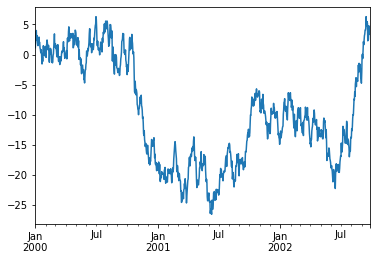

In [41]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot(); # Investigar tarea moral

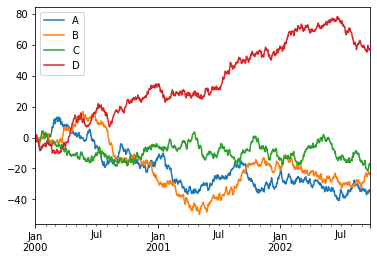

In [42]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)

df = df.cumsum()
df.plot();


## Guardar

In [43]:
df.to_csv("foo.csv")

In [44]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")